##### Import des librairies python et définition de constantes

In [1]:
import numpy as np
import pickle
#%matplotlib # A activer si on veut que les images s'affichent en dehors du notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

pickle_save_path = "../../Data/"
pickle_col_augmented_path = "../../Data/col_augmented.pickle"
pickle_col_not_augmented_path = "../../Data/col_not_augmented.pickle"
pickle_grey_augmented_path = "../../Data/grey_augmented.pickle"
pickle_grey_not_augmented_path = "../../Data/grey_not_augmented.pickle"

# GreyScale Augmented

###### Import des données

In [2]:
with open(pickle_grey_augmented_path, 'rb') as my_pickle:
    X, Y = pickle.load(my_pickle)

Description des données

In [3]:
X_pos = X[np.where(Y==1)[0]]
X_neg = X[np.where(Y==0)[0]]
print("Il y a {} positifs.".format(len(X_pos)))
print("Il y a {} negatifs.".format(len(X_neg)))

Il y a 2709 positifs.
Il y a 2730 negatifs.


Affichage d'une image

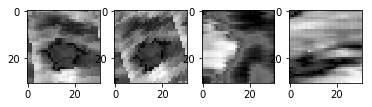

In [4]:
plt.subplot(141)
plt.imshow(X_pos[0], cmap='gray')
plt.subplot(142)
plt.imshow(X_pos[1], cmap='gray')
plt.subplot(143)
plt.imshow(X_neg[3], cmap='gray')
plt.subplot(144)
plt.imshow(X_neg[4], cmap='gray')
plt.show()

### Visualisation : Algorithme PCA et T-SNE (Projection en 2d ou 3d des données)

##### PCA 2D

In [5]:
#we normalize the data
X_norm = normalize(X.reshape((X.shape[0],-1)))

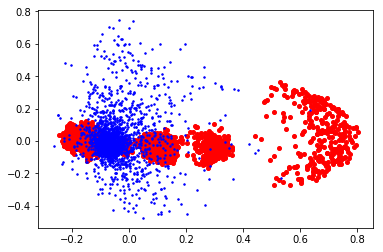

In [6]:
reduced_X = PCA(n_components=2).fit_transform(X_norm)
plt.plot(reduced_X[np.where(Y==1)[0]][:, 0], reduced_X[np.where(Y==1)[0]][:, 1], 'k.', markersize=8, color = "red")
plt.plot(reduced_X[np.where(Y==0)[0]][:, 0], reduced_X[np.where(Y==0)[0]][:, 1], 'k.', markersize=3, color = "blue")
plt.show()

##### PCA 3D

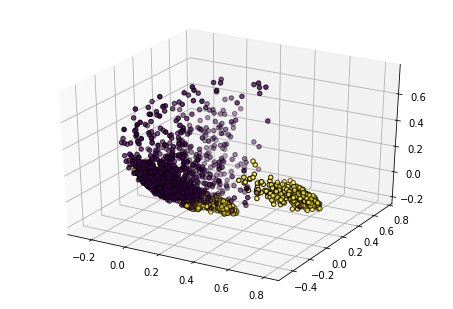

In [7]:
fig1 = plt.figure()
ax = Axes3D(fig1)
reduced_X = PCA(n_components=3).fit_transform(X_norm)
ax.scatter(reduced_X[:, 0], reduced_X[:, 1], reduced_X[:, 2], c=Y,
           edgecolor='k')
plt.show()

##### T-SNE 2D

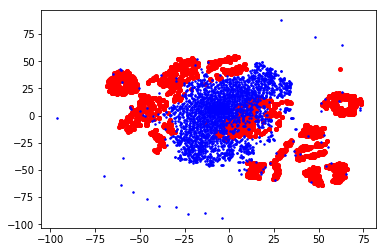

In [8]:
reduced_X = TSNE(n_components=2).fit_transform(X_norm)
plt.plot(reduced_X[np.where(Y==1)[0]][:, 0], reduced_X[np.where(Y==1)[0]][:, 1], 'k.', markersize=8, color = "red")
plt.plot(reduced_X[np.where(Y==0)[0]][:, 0], reduced_X[np.where(Y==0)[0]][:, 1], 'k.', markersize=3, color = "blue")
plt.show()